In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
inter_price = pd.read_excel("E:\\SOFT\\General_Subjects\\artificial_intelligence\\AI_projects\dataset\\internet_prices\\all_csv-sorted.xlsx")
plt.style.use('seaborn-bright')
inter_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        243 non-null    int64  
 1   Country code                                      243 non-null    object 
 2   Country                                           243 non-null    object 
 3   Continental region                                243 non-null    object 
 4   NO. OF Internet Plans                             231 non-null    float64
 5   Average price of 1GB (USD)                        243 non-null    object 
 6   Cheapest 1GB for 30 days (USD)                    231 non-null    float64
 7   Most expensive 1GB (USD)                          231 non-null    float64
 8   Average price of 1GB (USD  at the start of 2021)  231 non-null    object 
 9   Average price of 1GB 

In [3]:
inter_price.describe()

,Unnamed: 0,NO. OF Internet Plans,Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Avg \n(Mbit/s)Ookla
count,243.000000,231.000000,231.000000,231.000000,141.000000
mean,121.069959,26.610390,1.718442,29.664848,37.275674
std,70.405549,16.457446,4.764523,59.235115,28.669584
min,0.000000,1.000000,0.000000,0.630000,4.890000
25%,60.500000,15.000000,0.215000,5.905000,16.730000
50%,121.000000,22.000000,0.630000,12.500000,27.840000
75%,181.500000,36.000000,1.370000,34.290000,49.660000
max,243.000000,60.000000,45.160000,768.870000,135.350000


In [4]:

#inter_price["most_exp_1GB"] = inter_price["most_exp_1GB"].replace(0, st.mean(inter_price["Most expensive 1GB (USD)"]))
#inter_price.drop(inter_price[inter_price["aver_price_1GB"] == "NO PROVIDERS"].index|inter_price[inter_price["aver_price_1GB"] == "HYPERINFLATION"].index|inter_price[inter_price["aver_price_1GB"] == "Prices listed in non-convertible 'units'"].index| inter_price[inter_price["aver_price_1GB"] =="UNRELIABLE EXCHANGE RATES"].index, inplace = True)
inter_price = inter_price.dropna()
#inter_price.drop(inter_price[inter_price["population"] == None].index, inplace = True)
#inter_price.drop(inter_price[inter_price["avg"] == None].index, inplace = True)
#inter_price["Average price of 1GB (USD  at the start of 2021)"] = inter_price["Average price of 1GB (USD  at the start of 2021)"].replace(0, st.mean(inter_price["Average price of 1GB (USD  at the start of 2021)"]))
#inter_price["Average price of 1GB (USD - at start of 2020)"] = inter_price["Average price of 1GB (USD - at start of 2020)"].replace(0, st.mean(inter_price["Average price of 1GB (USD - at start of 2020)"]))
inter_price.head()

,Unnamed: 0,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291",37.15
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533",9.50


In [5]:
inter_price.columns

Index(['Unnamed: 0', 'Country code', 'Country', 'Continental region',
       'NO. OF Internet Plans ', 'Average price of 1GB (USD)',
       'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (USD)',
       'Average price of 1GB (USD  at the start of 2021)',
       'Average price of 1GB (USD – at start of 2020)', 'Internet users',
       'Population', 'Avg \n(Mbit/s)Ookla'],
      dtype='object')

In [6]:
inter_price.drop('Unnamed: 0',axis = 1,inplace = True) 
inter_price.drop('Country code',axis = 1,inplace = True) 
inter_price.drop('Avg \n(Mbit/s)Ookla',axis = 1,inplace = True) 

inter_price['Internet plans'] = inter_price['NO. OF Internet Plans ']
inter_price.drop('NO. OF Internet Plans ',axis = 1,inplace = True) 

inter_price['Avg price'] = inter_price['Average price of 1GB (USD)']
inter_price.drop('Average price of 1GB (USD)',axis = 1,inplace = True) 

inter_price['Cheapest'] = inter_price['Cheapest 1GB for 30 days (USD)']
inter_price.drop('Cheapest 1GB for 30 days (USD)',axis = 1,inplace = True) 

inter_price['Most expensive'] = inter_price['Most expensive 1GB (USD)']
inter_price.drop('Most expensive 1GB (USD)',axis = 1,inplace = True)

inter_price['Avg price (2021)'] = inter_price['Average price of 1GB (USD  at the start of 2021)']
inter_price.drop('Average price of 1GB (USD  at the start of 2021)',axis = 1,inplace = True) 

inter_price['Avg price (2020)'] = inter_price['Average price of 1GB (USD – at start of 2020)']
inter_price.drop('Average price of 1GB (USD – at start of 2020)',axis = 1,inplace = True)

In [7]:
# Dropping rows with no population specified
# Dropping rows with no avg price
# Dropping rows with no internet plans
inter_price.drop(inter_price[inter_price['Population'].isnull()].index,inplace = True)

inter_price.drop(inter_price[inter_price['Avg price'] == 'NO PROVIDERS'].index,inplace = True)
inter_price.drop(inter_price[inter_price['Avg price'] == 'HYPERINFLATION'].index,inplace = True)
inter_price.drop(inter_price[inter_price['Avg price'] == "Prices listed in non-convertible 'units'"].index,inplace = True)

inter_price.drop(inter_price[inter_price['Internet plans'].isnull()].index,inplace = True)

inter_price.drop(inter_price[inter_price['Avg price (2020)'] == 'NO PACKAGES'].index,inplace = True)
inter_price.drop(inter_price[inter_price['Avg price (2021)'] == 'NO PACKAGES'].index,inplace = True)

In [8]:
inter_price.isnull().sum()

Country               0
Continental region    0
Internet users        0
Population            0
Internet plans        0
Avg price             0
Cheapest              0
Most expensive        0
Avg price (2021)      0
Avg price (2020)      0
dtype: int64

In [9]:
inter_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 227
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             135 non-null    object 
 1   Continental region  135 non-null    object 
 2   Internet users      135 non-null    object 
 3   Population          135 non-null    object 
 4   Internet plans      135 non-null    float64
 5   Avg price           135 non-null    object 
 6   Cheapest            135 non-null    float64
 7   Most expensive      135 non-null    float64
 8   Avg price (2021)    135 non-null    object 
 9   Avg price (2020)    135 non-null    object 
dtypes: float64(3), object(7)
memory usage: 11.6+ KB


In [10]:
inter_price['Internet users'] = inter_price['Internet users'].map(lambda e: e.replace(',',''))
inter_price['Internet users'] = inter_price['Internet users'].astype(int)

inter_price['Population'] = inter_price['Population'].map(lambda e: e.replace(',',''))
inter_price['Population'] = inter_price['Population'].astype(int)

inter_price['Internet plans'] = inter_price['Internet plans'].astype(int)

inter_price['Avg price'] = inter_price['Avg price'].astype(float)

inter_price['Avg price (2020)'] = inter_price['Avg price (2020)'].astype(float)

inter_price['Avg price (2021)'] = inter_price['Avg price (2021)'].astype(float)

In [11]:
inter_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 227
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             135 non-null    object 
 1   Continental region  135 non-null    object 
 2   Internet users      135 non-null    int32  
 3   Population          135 non-null    int32  
 4   Internet plans      135 non-null    int32  
 5   Avg price           135 non-null    float64
 6   Cheapest            135 non-null    float64
 7   Most expensive      135 non-null    float64
 8   Avg price (2021)    135 non-null    float64
 9   Avg price (2020)    135 non-null    float64
dtypes: float64(5), int32(3), object(2)
memory usage: 10.0+ KB


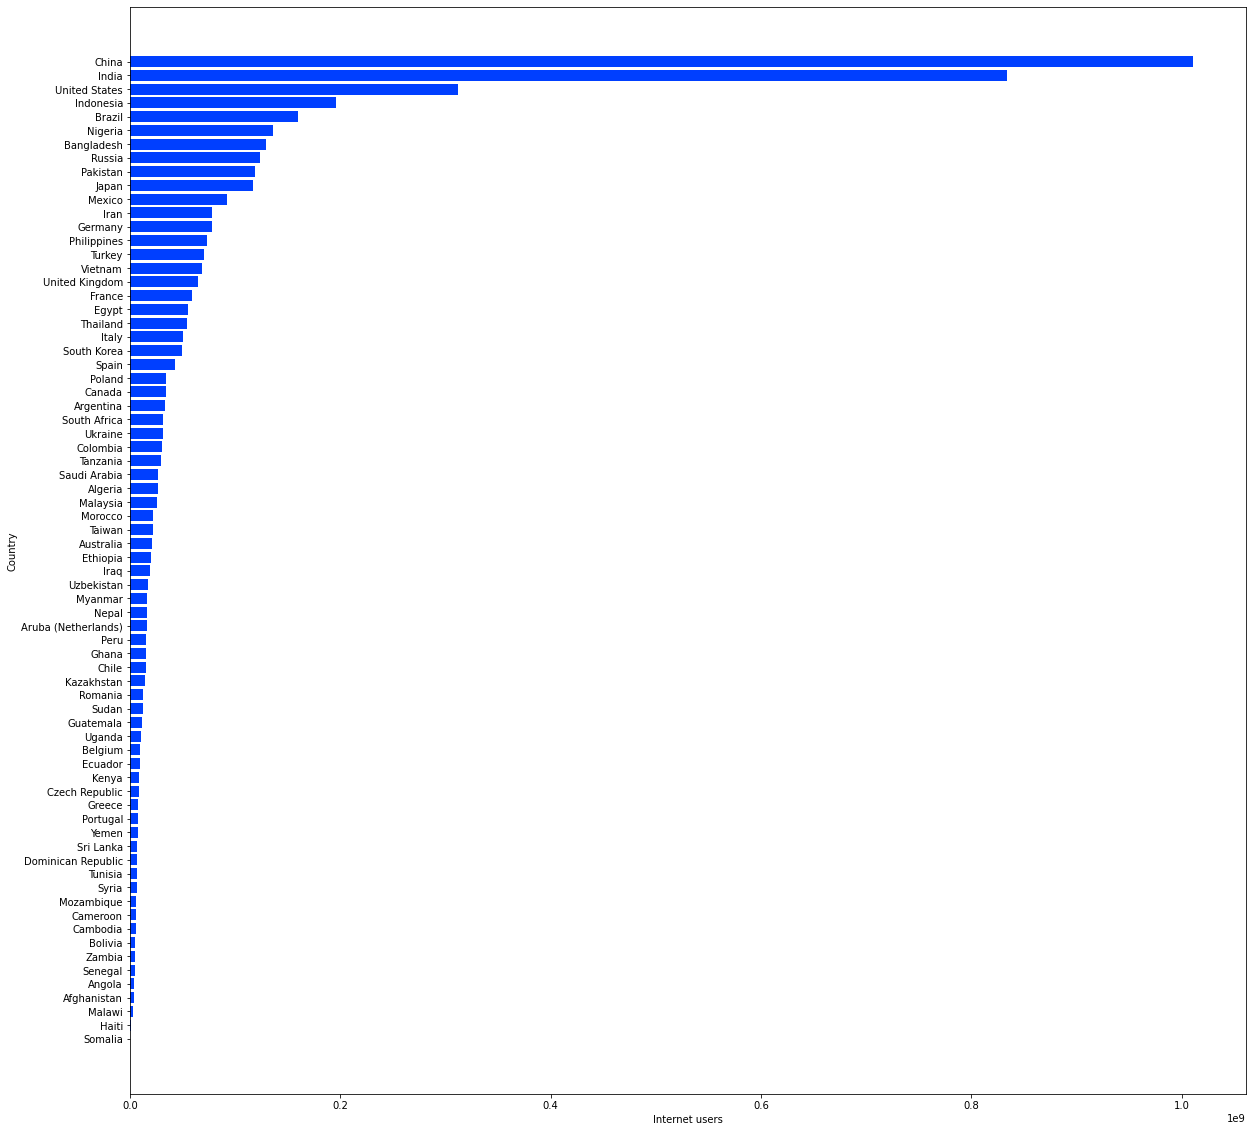

In [12]:
dt = inter_price[(inter_price['Population'] >= 10000000)]
X = dt.sort_values(by = 'Internet users')['Country']
Y = dt.sort_values(by = 'Internet users')['Internet users']
f = plt.figure()
f.set_size_inches(20, f.get_figheight()*5, forward=True)
plt.barh(X,Y)
plt.xlabel('Internet users')
plt.ylabel('Country')
plt.show()

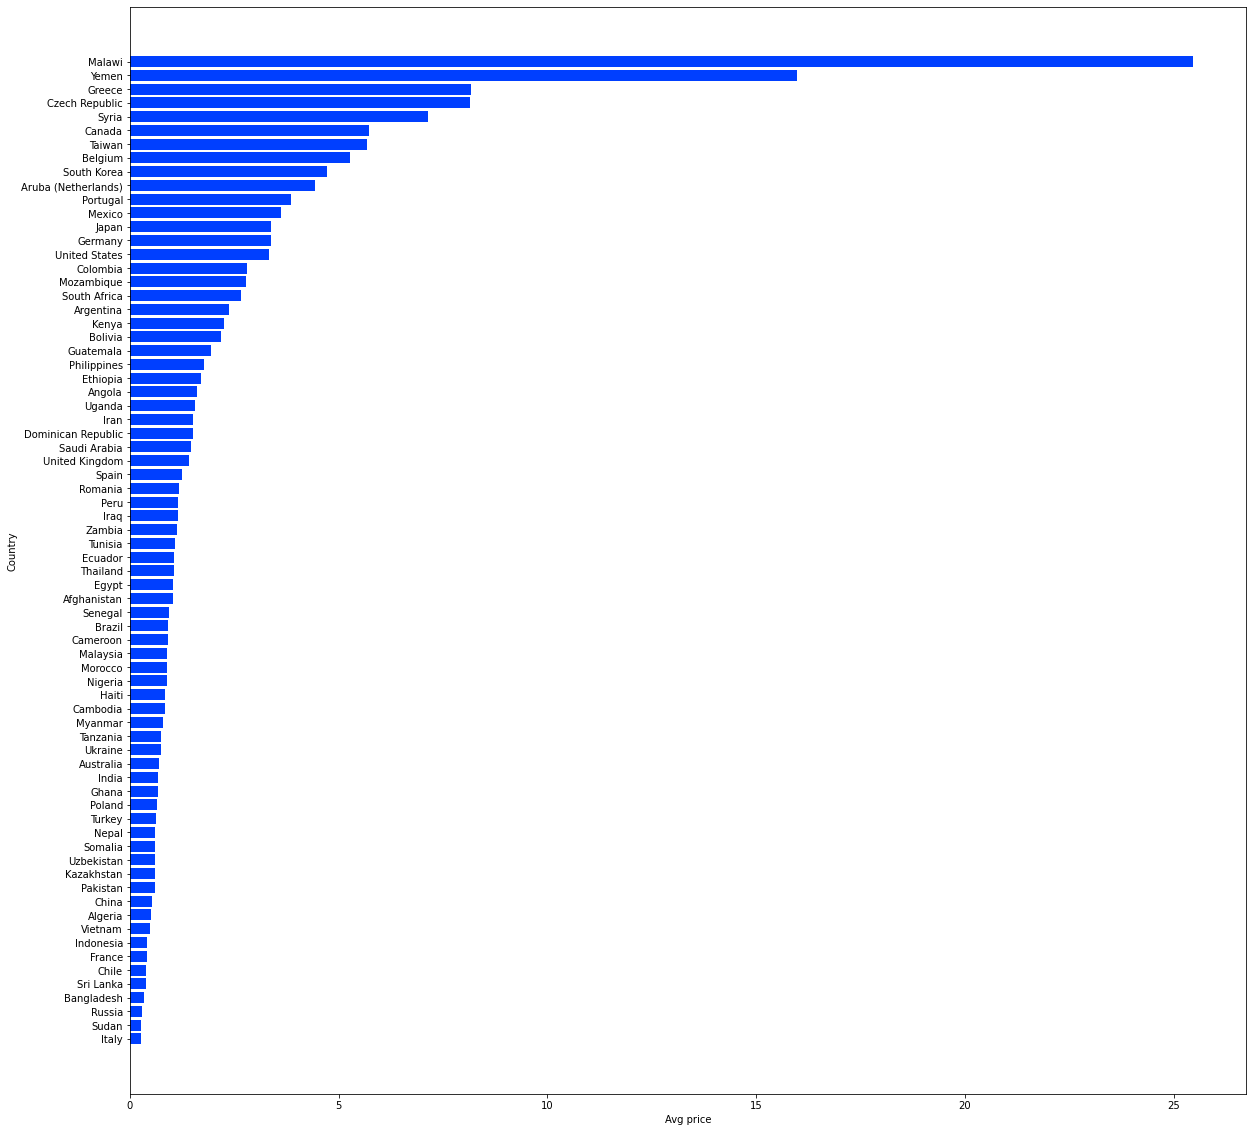

In [13]:
X = dt.sort_values(by = 'Avg price')['Country']
Y = dt.sort_values(by = 'Avg price')['Avg price']
f = plt.figure()
f.set_size_inches(20, f.get_figheight()*5, forward=True)
plt.barh(X,Y)
plt.xlabel('Avg price')
plt.ylabel('Country')
plt.show()

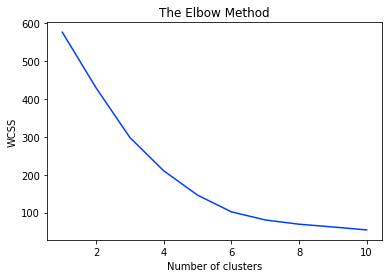

In [14]:
X = dt.iloc[:,2:]

sc = StandardScaler()
X = sc.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(
        n_clusters=2, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=dt.columns[2:])
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=800)
fig4.show()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
